In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

In [2]:
df=pd.read_csv('Referral_Join_Prediction.csv')

In [3]:
df.head()

,referral_id,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined
0,1,28,5.0,Delhi,106,89.0,72,87.0,83.0,Male,123.0,10.00,33.04,?,10.0,3,141,EL0,Yes
1,2,26,3.0,Pune,65,63.0,77,94.0,85.0,Male,83.0,6.09,27.39,20.87,10.0,10,80,ML0,Yes
2,3,23,2.0,Mumbai,45,92.0,85,84.0,72.0,Male,62.0,41.74,2.61,40.00,2.0,1,60,EL0,No
3,4,29,6.0,Bangalore,126,60.0,95,95.0,67.0,Male,146.0,31.30,9.13,23.48,9.0,3,142,ML0,Yes
4,5,26,3.0,Mumbai,65,92.0,70,80.0,92.0,Female,83.0,25.65,30.43,16.52,7.0,4,89,EL0,Yes


In [4]:
df.shape

(499, 19)

In [5]:
df.isnull().sum()

referral_id                             0
referral_age                            0
referral_exp_in_years                   0
referral_preferred_city                 0
referral_current_salary                 0
referral_10_th_marks                    1
referral_12th_marks                     0
referral_graduation_marks               1
referral_post_grad_marks                1
referral_gender                         0
referral_expected_sal                   2
referral_aptitude_numerical_score       3
referral_aptitude_verbal_score         10
referral_aptitude_reasoning_score       4
referral_Management_Interview_score     1
referral_HR_Interview_score             0
Salary offered                          0
Emp_Salary_Grade                        0
Joined                                  0
dtype: int64

In [6]:
df.dropna().shape

(478, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   referral_id                          499 non-null    int64  
 1   referral_age                         499 non-null    int64  
 2   referral_exp_in_years                499 non-null    float64
 3   referral_preferred_city              499 non-null    object 
 4   referral_current_salary              499 non-null    int64  
 5   referral_10_th_marks                 498 non-null    float64
 6   referral_12th_marks                  499 non-null    int64  
 7   referral_graduation_marks            498 non-null    float64
 8   referral_post_grad_marks             498 non-null    float64
 9   referral_gender                      499 non-null    object 
 10  referral_expected_sal                497 non-null    float64
 11  referral_aptitude_numerical_scor

In [8]:
df.describe(include='all')

,referral_id,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined
count,499.000000,499.000000,499.000000,499,499.000000,498.000000,499.000000,498.000000,498.000000,499,497.000000,496,489.000000,495,498.000000,499.000000,499.000000,499,499
unique,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,3,NaN,100,NaN,107,NaN,NaN,NaN,3,2
top,NaN,NaN,NaN,Mumbai,NaN,NaN,NaN,NaN,NaN,Male,NaN,36.96,NaN,28.26,NaN,NaN,NaN,EL0,No
freq,NaN,NaN,NaN,232,NaN,NaN,NaN,NaN,NaN,260,NaN,14,NaN,10,NaN,NaN,NaN,221,261
mean,250.000000,27.020040,4.053307,NaN,86.472946,77.295181,77.478958,77.096386,78.269076,NaN,108.692153,NaN,21.840491,NaN,5.732932,5.651303,102.006012,NaN,NaN
std,144.193157,2.811979,2.609814,NaN,52.566584,11.128083,10.932113,10.812223,10.478487,NaN,58.722281,NaN,12.338425,NaN,2.922706,5.500516,52.619704,NaN,NaN
min,1.000000,20.000000,1.000000,NaN,25.000000,-1.000000,12.000000,-1.000000,60.000000,NaN,40.000000,NaN,0.430000,NaN,1.000000,1.000000,40.000000,NaN,NaN
25%,125.500000,25.000000,2.000000,NaN,45.000000,68.000000,69.000000,68.000000,69.000000,NaN,62.000000,NaN,11.740000,NaN,3.000000,3.000000,60.000000,NaN,NaN
50%,250.000000,27.000000,4.000000,NaN,85.000000,78.000000,77.000000,77.000000,78.000000,NaN,103.000000,NaN,20.870000,NaN,6.000000,5.000000,101.000000,NaN,NaN
75%,374.500000,29.000000,6.000000,NaN,126.000000,87.000000,87.000000,86.000000,88.750000,NaN,143.000000,NaN,32.610000,NaN,8.000000,8.000000,141.000000,NaN,NaN


In [9]:
df_dupli=df[df.duplicated()]
df_dupli

,referral_id,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined


In [10]:
df[df.isnull().sum()[df.isnull().sum()>(0)].index].dtypes

referral_10_th_marks                   float64
referral_graduation_marks              float64
referral_post_grad_marks               float64
referral_expected_sal                  float64
referral_aptitude_numerical_score       object
referral_aptitude_verbal_score         float64
referral_aptitude_reasoning_score       object
referral_Management_Interview_score    float64
dtype: object

In [11]:
df.isnull().sum()

referral_id                             0
referral_age                            0
referral_exp_in_years                   0
referral_preferred_city                 0
referral_current_salary                 0
referral_10_th_marks                    1
referral_12th_marks                     0
referral_graduation_marks               1
referral_post_grad_marks                1
referral_gender                         0
referral_expected_sal                   2
referral_aptitude_numerical_score       3
referral_aptitude_verbal_score         10
referral_aptitude_reasoning_score       4
referral_Management_Interview_score     1
referral_HR_Interview_score             0
Salary offered                          0
Emp_Salary_Grade                        0
Joined                                  0
dtype: int64

In [75]:
df['referral_aptitude_reasoning_score']=df['referral_aptitude_reasoning_score'].replace('?',np.nan)

In [76]:
df[df['referral_aptitude_reasoning_score']=='?']

,referral_id,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined


In [77]:
df['referral_aptitude_reasoning_score']=df['referral_aptitude_reasoning_score'].apply(float)

In [78]:
mean=df['referral_aptitude_reasoning_score'].mean()

In [79]:
df['referral_aptitude_reasoning_score']=df['referral_aptitude_reasoning_score'].replace(np.nan,mean)

In [80]:
df.head(5)

,referral_id,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined
0,1,28.0,5.0,Delhi,106.0,89.0,72.0,87.0,83.0,Male,123.0,10.00,33.04,23.584412,10.0,15.5,141.0,EL0,Yes
1,2,26.0,3.0,Pune,65.0,63.0,77.0,94.0,85.0,Male,83.0,6.09,27.39,20.870000,10.0,15.5,80.0,ML0,Yes
2,3,23.0,2.0,Mumbai,45.0,92.0,85.0,84.0,72.0,Male,62.0,41.74,2.61,40.000000,2.0,15.5,60.0,EL0,No
3,4,29.0,6.0,Bangalore,126.0,60.0,95.0,95.0,67.0,Male,146.0,31.30,9.13,23.480000,9.0,15.5,142.0,ML0,Yes
4,5,26.0,3.0,Mumbai,65.0,92.0,70.0,80.0,92.0,Female,83.0,25.65,30.43,16.520000,7.0,15.5,89.0,EL0,Yes


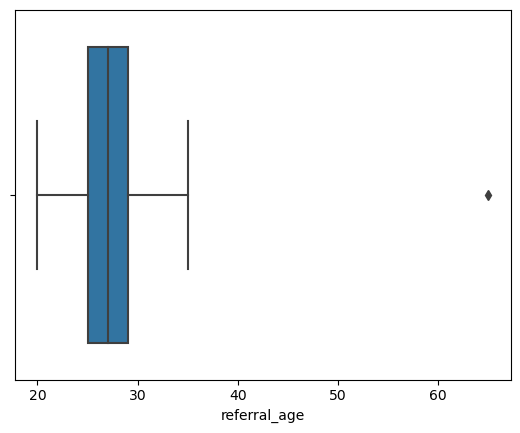

In [12]:
sns.boxplot(x='referral_age',data=df);

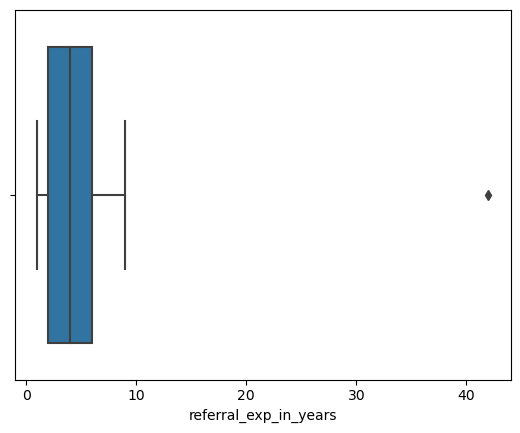

In [13]:
sns.boxplot(x='referral_exp_in_years',data=df);

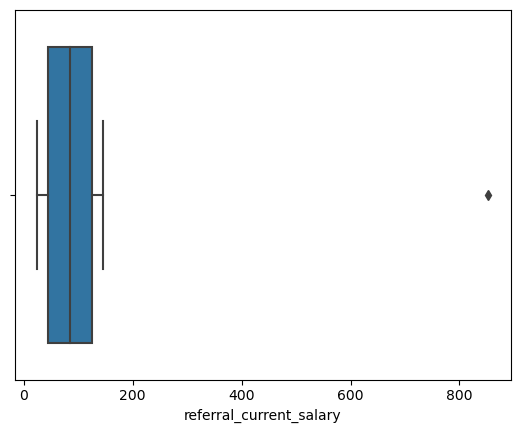

In [14]:
sns.boxplot(x='referral_current_salary',data=df);

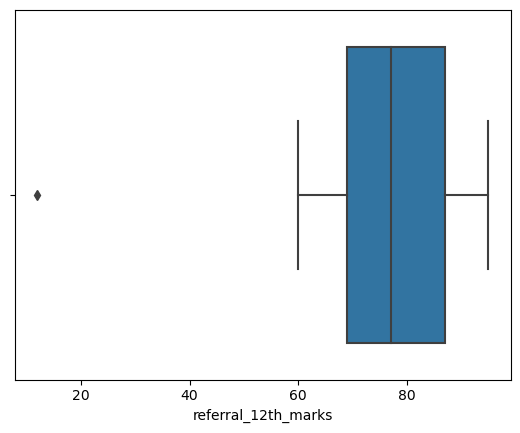

In [15]:
sns.boxplot(x='referral_12th_marks',data=df);

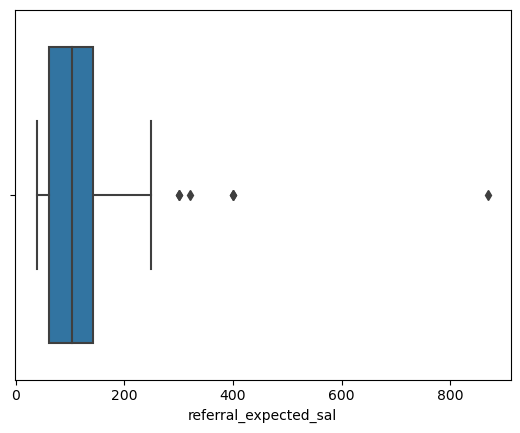

In [16]:
sns.boxplot(x='referral_expected_sal',data=df);

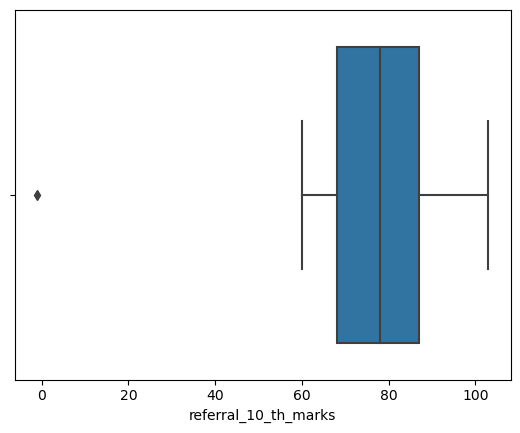

In [17]:
sns.boxplot(x='referral_10_th_marks',data=df);

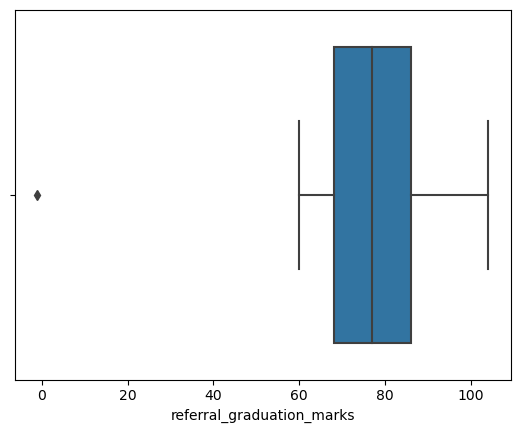

In [18]:
sns.boxplot(x='referral_graduation_marks',data=df);

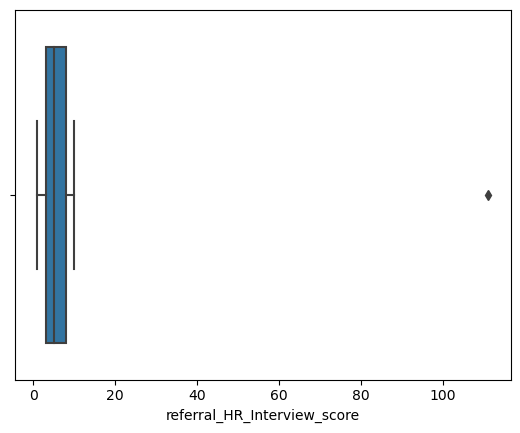

In [19]:
sns.boxplot(x='referral_HR_Interview_score',data=df);

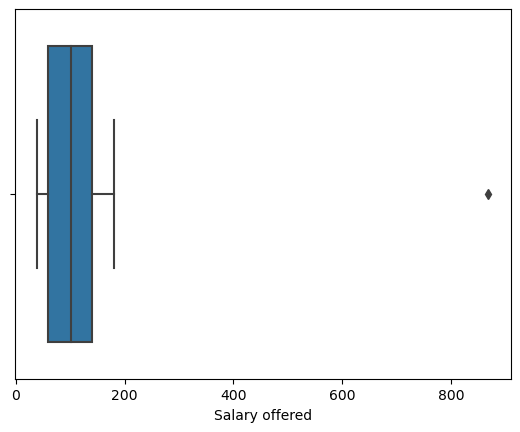

In [20]:
sns.boxplot(x='Salary offered',data=df);

In [21]:
df.head()

,referral_id,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined
0,1,28,5.0,Delhi,106,89.0,72,87.0,83.0,Male,123.0,10.00,33.04,?,10.0,3,141,EL0,Yes
1,2,26,3.0,Pune,65,63.0,77,94.0,85.0,Male,83.0,6.09,27.39,20.87,10.0,10,80,ML0,Yes
2,3,23,2.0,Mumbai,45,92.0,85,84.0,72.0,Male,62.0,41.74,2.61,40.00,2.0,1,60,EL0,No
3,4,29,6.0,Bangalore,126,60.0,95,95.0,67.0,Male,146.0,31.30,9.13,23.48,9.0,3,142,ML0,Yes
4,5,26,3.0,Mumbai,65,92.0,70,80.0,92.0,Female,83.0,25.65,30.43,16.52,7.0,4,89,EL0,Yes


In [22]:
df.loc[df['referral_current_salary']==26,'referral_expected_sal']=df.loc[df['referral_current_salary']==26,'referral_expected_sal'].fillna(43.0)

In [23]:
df.loc[df['referral_current_salary']==106,'referral_expected_sal']=df.loc[df['referral_current_salary']==106,'referral_expected_sal'].fillna(123.0)

In [24]:
df[df['referral_current_salary']==106]

,referral_id,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined
0,1,28,5.0,Delhi,106,89.0,72,87.0,83.0,Male,123.0,10.00,33.04,?,10.0,3,141,EL0,Yes
20,21,27,5.0,Mumbai,106,64.0,90,66.0,79.0,Female,123.0,21.74,34.78,34.35,3.0,1,123,EL0,No
26,27,28,5.0,Bangalore,106,95.0,69,86.0,87.0,Male,123.0,33.91,17.83,3.91,9.0,8,121,EL0,Yes
35,36,28,4.0,Pune,106,64.0,91,71.0,66.0,Male,123.0,8.26,16.09,?,8.0,2,124,ML0,Yes
51,52,28,5.0,Mumbai,106,75.0,93,90.0,83.0,Male,130.0,4.35,22.61,41.30,2.0,10,121,EL0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,466,28,5.0,Bangalore,106,60.0,94,94.0,67.0,Female,123.0,3.91,6.09,39.13,5.0,6,121,EL0,No
475,476,28,5.0,Mumbai,106,93.0,69,80.0,70.0,Female,123.0,40.00,17.39,19.13,3.0,4,121,EL0,No
479,480,28,5.0,Pune,106,79.0,60,77.0,80.0,Male,123.0,35.65,37.39,15.22,8.0,8,121,ML0,Yes
484,485,28,5.0,Delhi,106,93.0,73,71.0,62.0,Male,140.0,10.00,11.74,32.17,9.0,2,121,EL0,No


In [25]:
df[df['referral_10_th_marks'].isnull()]

,referral_id,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined
112,113,27,4.0,Bangalore,85,NaN,92,85.0,70.0,Female,103.0,8.26,40.0,42.17,7.0,6,101,EL0,Yes


In [26]:
df.loc[df['referral_10_th_marks']==113,'referral_12th_marks']=df.loc[df['referral_10_th_marks']==113,'referral_12th_marks'].fillna(92.0)

In [27]:
df[df['referral_10_th_marks'].isnull()]

,referral_id,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined
112,113,27,4.0,Bangalore,85,NaN,92,85.0,70.0,Female,103.0,8.26,40.0,42.17,7.0,6,101,EL0,Yes


In [28]:
df.isnull().sum()

referral_id                             0
referral_age                            0
referral_exp_in_years                   0
referral_preferred_city                 0
referral_current_salary                 0
referral_10_th_marks                    1
referral_12th_marks                     0
referral_graduation_marks               1
referral_post_grad_marks                1
referral_gender                         0
referral_expected_sal                   0
referral_aptitude_numerical_score       3
referral_aptitude_verbal_score         10
referral_aptitude_reasoning_score       4
referral_Management_Interview_score     1
referral_HR_Interview_score             0
Salary offered                          0
Emp_Salary_Grade                        0
Joined                                  0
dtype: int64

In [29]:
df.dropna(inplace=True)

In [30]:
df.isnull().sum()

referral_id                            0
referral_age                           0
referral_exp_in_years                  0
referral_preferred_city                0
referral_current_salary                0
referral_10_th_marks                   0
referral_12th_marks                    0
referral_graduation_marks              0
referral_post_grad_marks               0
referral_gender                        0
referral_expected_sal                  0
referral_aptitude_numerical_score      0
referral_aptitude_verbal_score         0
referral_aptitude_reasoning_score      0
referral_Management_Interview_score    0
referral_HR_Interview_score            0
Salary offered                         0
Emp_Salary_Grade                       0
Joined                                 0
dtype: int64

## OUTLIER TREATMENT

In [40]:
#using user-define function
def remove_outliers(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [32]:
lr_age,ur_age=remove_outliers(df['referral_age'])
df['referral_age']=np.where(df['referral_age']>ur_age,ur_age,df['referral_age'])
df['referral_age']=np.where(df['referral_age']<lr_age,lr_age,df['referral_age'])

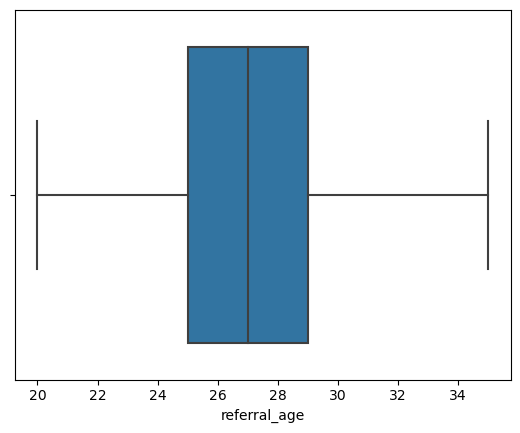

In [39]:
sns.boxplot(x='referral_age',data=df);

In [56]:
lr_exp_in_years,ur_exp_in_years=remove_outliers(df['referral_exp_in_years'])
df['referral_exp_in_years']=np.where(df['referral_exp_in_years']>ur_exp_in_years,ur_exp_in_years,df['referral_exp_in_years'])
df['referral_exp_in_years']=np.where(df['referral_exp_in_years']<lr_exp_in_years,lr_exp_in_years,df['referral_exp_in_years'])

In [ ]:
lr_exp_in_yr,ur_exp_in_yr=remove_outliers(df['referral_exp_in_years'])
df['referral_exp_in_years']=np.where(df['referral_exp_in_years']>ur_exp_in_yr,ur_exp_in_yr,df['referral_exp_in_years'])
df['referral_exp_in_years']=np.where(df['referral_exp_in_years']<lr_exp_in_yr,lr_exp_in_yr,df['referral_exp_in_years'])

<AxesSubplot:xlabel='referral_exp_in_years'>

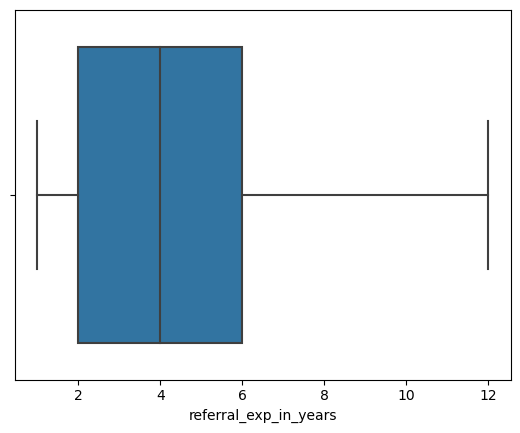

In [35]:
sns.boxplot(x='referral_exp_in_years',data=df)

In [41]:
lr_curr_sal,ur_curr_sal=remove_outliers(df['referral_current_salary'])
df['referral_current_salary']=np.where(df['referral_current_salary']>ur_curr_sal,ur_curr_sal,df['referral_current_salary'])
df['referral_current_salary']=np.where(df['referral_current_salary']<lr_curr_sal,lr_curr_sal,df['referral_current_salary'])

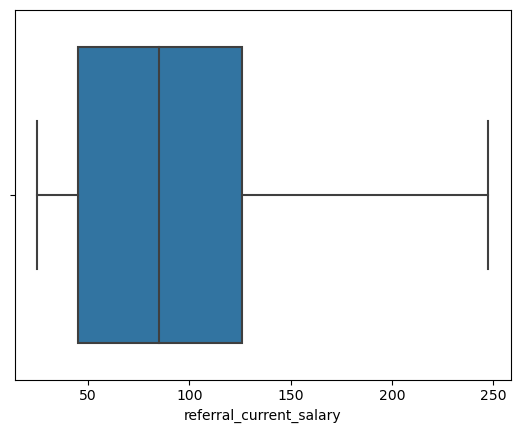

In [42]:
sns.boxplot(x='referral_current_salary',data=df);

In [43]:
lr_10th_marks,ur_10th_marks=remove_outliers(df['referral_10_th_marks'])
df['referral_10_th_marks']=np.where(df['referral_10_th_marks']>ur_10th_marks,ur_10th_marks,df['referral_10_th_marks'])
df['referral_10_th_marks']=np.where(df['referral_10_th_marks']<lr_10th_marks,lr_10th_marks,df['referral_10_th_marks'])

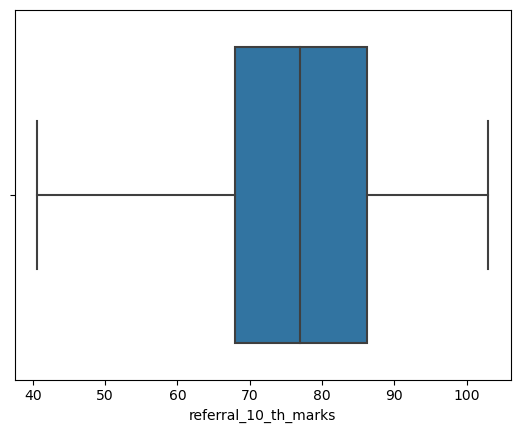

In [44]:
sns.boxplot(x='referral_10_th_marks',data=df);

In [45]:
lr_12th,ur_12th=remove_outliers(df['referral_12th_marks'])
df['referral_12th_marks']=np.where(df['referral_12th_marks']>ur_12th,ur_12th,df['referral_12th_marks'])
df['referral_12th_marks']=np.where(df['referral_12th_marks']<lr_12th,lr_12th,df['referral_12th_marks'])

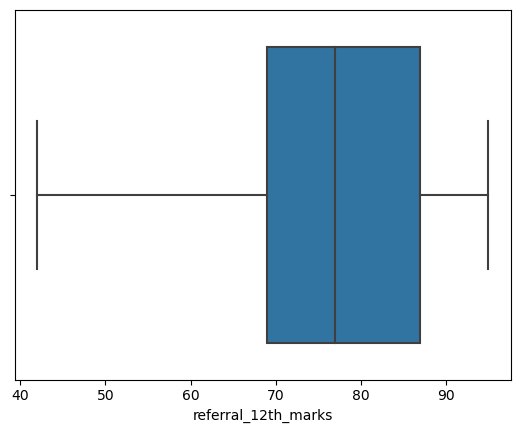

In [46]:
sns.boxplot(x='referral_12th_marks',data=df);

In [47]:
lr_grd_marks,ur_grd_marks=remove_outliers(df['referral_graduation_marks'])
df['referral_graduation_marks']=np.where(df['referral_graduation_marks']>ur_grd_marks,ur_grd_marks,df['referral_graduation_marks'])
df['referral_graduation_marks']=np.where(df['referral_graduation_marks']<lr_grd_marks,lr_grd_marks,df['referral_graduation_marks'])                                                                                                      


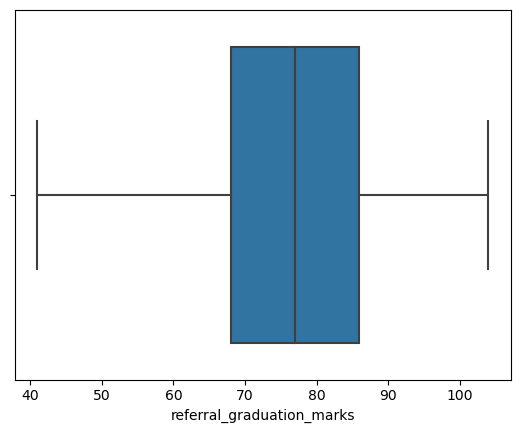

In [48]:
sns.boxplot(x='referral_graduation_marks',data=df);

In [49]:
lr_exp_sal,ur_exp_sal=remove_outliers(df['referral_expected_sal'])
df['referral_expected_sal']=np.where(df['referral_expected_sal']>ur_exp_sal,ur_exp_sal,df['referral_expected_sal'])
df['referral_expected_sal']=np.where(df['referral_expected_sal']<lr_exp_sal,lr_exp_sal,df['referral_expected_sal'])

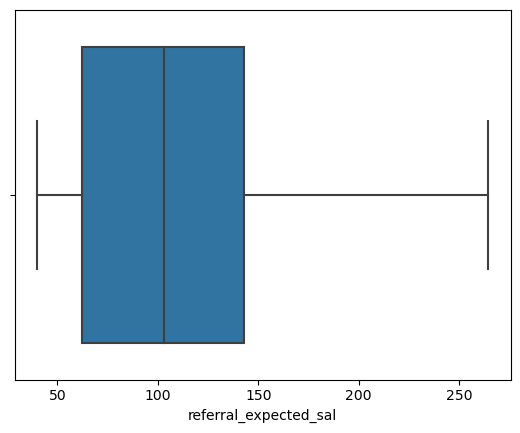

In [50]:
sns.boxplot(x='referral_expected_sal',data=df);

In [51]:
lr_sal_off,ur_sal_off=remove_outliers(df['Salary offered'])
df['Salary offered']=np.where(df['Salary offered']>ur_sal_off,ur_sal_off,df['Salary offered'])
df['Salary offered']=np.where(df['Salary offered']<lr_sal_off,lr_sal_off,df['Salary offered'])

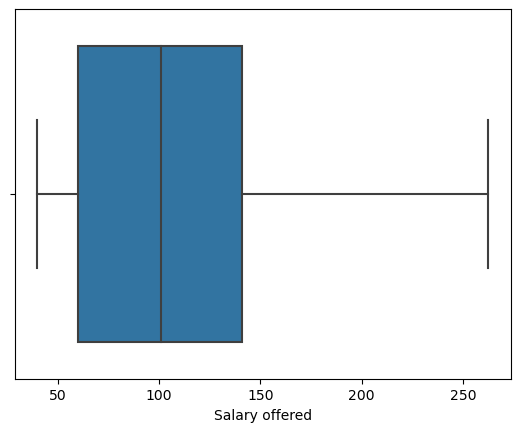

In [52]:
sns.boxplot(x='Salary offered',data=df);

In [53]:
ur_HR_Int,lr_HR_Int=remove_outliers(df['referral_HR_Interview_score'])
df['referral_HR_Interview_score']=np.where(df['referral_HR_Interview_score']>ur_HR_Int,ur_HR_Int,df['referral_HR_Interview_score'])
df['referral_HR_Interview_score']=np.where(df['referral_HR_Interview_score']<lr_HR_Int,lr_HR_Int,df['referral_HR_Interview_score'])

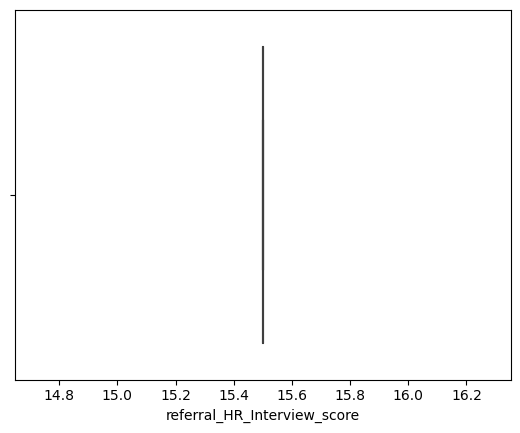

In [54]:
sns.boxplot(x='referral_HR_Interview_score',data=df);

## DATA SCALING

## STANDARD SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std_scale=StandardScaler()
std_scale

In [ ]:
df_std=df.copy()
df_std.head()

In [ ]:
df.isnull().sum()

In [ ]:
df_std['referral_age']=std_scale.fit_transform(df_std[['referral_age']])
df_std['referral_exp_in_years ']=std_scale.fit_transform(df_std[['referral_exp_in_years']])
df_std['referral_current_salary']=std_scale.fit_transform(df_std[['referral_current_salary']])
df_std['referral_10_th_marks']=std_scale.fit_transform(df_std[['referral_10_th_marks']])
df_std['referral_12th_marks']=std_scale.fit_transform(df_std[['referral_12th_marks']])
df_std['referral_graduation_marks']=std_scale.fit_transform(df_std[['referral_graduation_marks']])


df_std['referral_post_grad_marks']=std_scale.fit_transform(df_std[['referral_post_grad_marks']])


df_std['referral_expected_sal']=std_scale.fit_transform(df_std[['referral_expected_sal']])
df_std['referral_HR_Interview_score']=std_scale.fit_transform(df_std[['referral_HR_Interview_score']])
df_std['Salary offered']=std_scale.fit_transform(df_std[['Salary offered']])

In [ ]:
df.head(5)

In [ ]:
df_std.head(5)

## MIN and MAX(0to1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
min_max=MinMaxScaler() 
min_max

In [ ]:
df_minmax=df.copy()
df_minmax.head()

In [ ]:
df.isnull().sum()

In [ ]:
df_minmax['referral_age']=min_max.fit_transform(df_minmax[['referral_age']])
df_minmax['referral_exp_in_years']=min_max.fit_transform(df_minmax[['referral_exp_in_years']])
df_minmax['referral_current_salary']=min_max.fit_transform(df_minmax[['referral_current_salary']])
df_minmax['referral_10_th_marks']=min_max.fit_transform(df_minmax[['referral_10_th_marks']])
df_minmax['referral_12th_marks']=min_max.fit_transform(df_minmax[['referral_12th_marks']])
df_minmax['referral_graduation_marks']=min_max.fit_transform(df_minmax[['referral_graduation_marks']])
df_minmax['referral_post_grad_marks']=min_max.fit_transform(df_minmax[['referral_post_grad_marks']])
df_minmax['referral_expected_sal']=min_max.fit_transform(df_minmax[['referral_expected_sal']])
df_minmax['referral_HR_Interview_score']=min_max.fit_transform(df_minmax[['referral_HR_Interview_score']])
df_minmax['Salary offered']=min_max.fit_transform(df_minmax[['Salary offered']])

In [ ]:
df_minmax.drop('referral_id',axis=1,inplace=True)

In [ ]:
df_minmax.boxplot()

## ROBUSTSCALER 

In [58]:
from sklearn.preprocessing import RobustScaler 

In [59]:
df_robust=df.copy()
df_robust

,referral_id,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined
0,1,28.0,5.0,Delhi,106.0,89.0,72.0,87.0,83.0,Male,123.0,10.00,33.04,?,10.0,15.5,141.0,EL0,Yes
1,2,26.0,3.0,Pune,65.0,63.0,77.0,94.0,85.0,Male,83.0,6.09,27.39,20.87,10.0,15.5,80.0,ML0,Yes
2,3,23.0,2.0,Mumbai,45.0,92.0,85.0,84.0,72.0,Male,62.0,41.74,2.61,40.00,2.0,15.5,60.0,EL0,No
3,4,29.0,6.0,Bangalore,126.0,60.0,95.0,95.0,67.0,Male,146.0,31.30,9.13,23.48,9.0,15.5,142.0,ML0,Yes
4,5,26.0,3.0,Mumbai,65.0,92.0,70.0,80.0,92.0,Female,83.0,25.65,30.43,16.52,7.0,15.5,89.0,EL0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,495,21.0,1.0,Pune,25.0,81.0,77.0,77.0,91.0,Male,42.0,19.13,16.09,6.52,9.0,15.5,40.0,EL0,Yes
495,496,21.0,1.0,Mumbai,25.0,74.0,95.0,67.0,81.0,Female,100.0,3.48,13.04,29.13,9.0,15.5,40.0,EL0,Yes
496,497,29.0,7.0,Mumbai,146.0,94.0,92.0,89.0,71.0,Male,200.0,38.70,5.22,39.57,9.0,15.5,161.0,EL0,Yes
497,498,30.0,7.0,Mumbai,143.0,64.0,89.0,61.0,88.0,Female,160.0,38.70,37.83,6.52,7.0,15.5,158.0,EL0,Yes


In [60]:
robust=RobustScaler()
robust

RobustScaler()

In [61]:
df.head().sum()

referral_id                                                        15
referral_age                                                    132.0
referral_exp_in_years                                            19.0
referral_preferred_city                DelhiPuneMumbaiBangaloreMumbai
referral_current_salary                                         407.0
referral_10_th_marks                                            396.0
referral_12th_marks                                             399.0
referral_graduation_marks                                       440.0
referral_post_grad_marks                                        399.0
referral_gender                                MaleMaleMaleMaleFemale
referral_expected_sal                                           497.0
referral_aptitude_numerical_score            10.006.0941.7431.3025.65
referral_aptitude_verbal_score                                  102.6
referral_aptitude_reasoning_score               ?20.8740.0023.4816.52
referral_Management_

In [62]:
df_robust['referral_age']=robust.fit_transform(df_robust[['referral_age']])
df_robust['referral_exp_in_years']=robust.fit_transform(df_robust[['referral_exp_in_years']])
df_robust['referral_current_salary']=robust.fit_transform(df_robust[['referral_current_salary']])
df_robust['referral_10_th_marks']=robust.fit_transform(df_robust[['referral_10_th_marks']])
df_robust['referral_12th_marks']=robust.fit_transform(df_robust[['referral_12th_marks']])
df_robust['referral_graduation_marks']=robust.fit_transform(df_robust[['referral_graduation_marks']])
df_robust['referral_post_grad_marks']=robust.fit_transform(df_robust[['referral_post_grad_marks']])
df_robust['referral_expected_sal']=robust.fit_transform(df_robust[['referral_expected_sal']])
df_robust['referral_HR_Interview_score']=robust.fit_transform(df_robust[['referral_HR_Interview_score']])
df_robust['Salary offered']=robust.fit_transform(df_robust[['Salary offered']])

<AxesSubplot:>

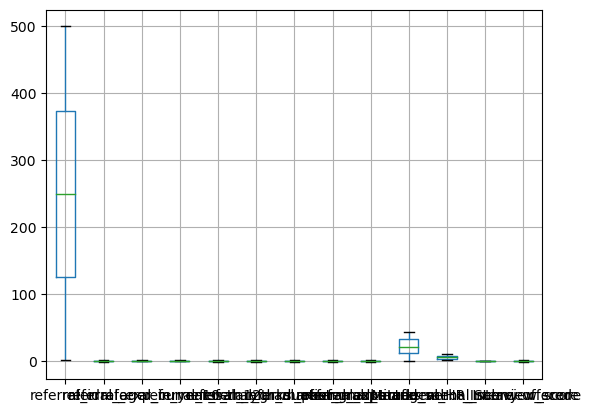

In [63]:
df_robust.boxplot()

## Variable Transformation

## one hot encoding

In [64]:
df_ohot=df.copy()
df_ohot

,referral_id,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined
0,1,28.0,5.0,Delhi,106.0,89.0,72.0,87.0,83.0,Male,123.0,10.00,33.04,?,10.0,15.5,141.0,EL0,Yes
1,2,26.0,3.0,Pune,65.0,63.0,77.0,94.0,85.0,Male,83.0,6.09,27.39,20.87,10.0,15.5,80.0,ML0,Yes
2,3,23.0,2.0,Mumbai,45.0,92.0,85.0,84.0,72.0,Male,62.0,41.74,2.61,40.00,2.0,15.5,60.0,EL0,No
3,4,29.0,6.0,Bangalore,126.0,60.0,95.0,95.0,67.0,Male,146.0,31.30,9.13,23.48,9.0,15.5,142.0,ML0,Yes
4,5,26.0,3.0,Mumbai,65.0,92.0,70.0,80.0,92.0,Female,83.0,25.65,30.43,16.52,7.0,15.5,89.0,EL0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,495,21.0,1.0,Pune,25.0,81.0,77.0,77.0,91.0,Male,42.0,19.13,16.09,6.52,9.0,15.5,40.0,EL0,Yes
495,496,21.0,1.0,Mumbai,25.0,74.0,95.0,67.0,81.0,Female,100.0,3.48,13.04,29.13,9.0,15.5,40.0,EL0,Yes
496,497,29.0,7.0,Mumbai,146.0,94.0,92.0,89.0,71.0,Male,200.0,38.70,5.22,39.57,9.0,15.5,161.0,EL0,Yes
497,498,30.0,7.0,Mumbai,143.0,64.0,89.0,61.0,88.0,Female,160.0,38.70,37.83,6.52,7.0,15.5,158.0,EL0,Yes


In [65]:
df_ohot=pd.get_dummies(df_ohot,drop_first=True)

In [66]:
df_ohot.head()

,referral_id,referral_age,referral_exp_in_years,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_expected_sal,referral_aptitude_verbal_score,...,referral_aptitude_reasoning_score_78.00,referral_aptitude_reasoning_score_8.26,referral_aptitude_reasoning_score_8.70,referral_aptitude_reasoning_score_89.00,referral_aptitude_reasoning_score_9.13,referral_aptitude_reasoning_score_9.57,referral_aptitude_reasoning_score_?,Emp_Salary_Grade_EL0,Emp_Salary_Grade_ML0,Joined_Yes
0,1,28.0,5.0,106.0,89.0,72.0,87.0,83.0,123.0,33.04,...,0,0,0,0,0,0,1,1,0,1
1,2,26.0,3.0,65.0,63.0,77.0,94.0,85.0,83.0,27.39,...,0,0,0,0,0,0,0,0,1,1
2,3,23.0,2.0,45.0,92.0,85.0,84.0,72.0,62.0,2.61,...,0,0,0,0,0,0,0,1,0,0
3,4,29.0,6.0,126.0,60.0,95.0,95.0,67.0,146.0,9.13,...,0,0,0,0,0,0,0,0,1,1
4,5,26.0,3.0,65.0,92.0,70.0,80.0,92.0,83.0,30.43,...,0,0,0,0,0,0,0,1,0,1


## lable encoding

In [67]:
df_le=df.copy()
df_le

,referral_id,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined
0,1,28.0,5.0,Delhi,106.0,89.0,72.0,87.0,83.0,Male,123.0,10.00,33.04,?,10.0,15.5,141.0,EL0,Yes
1,2,26.0,3.0,Pune,65.0,63.0,77.0,94.0,85.0,Male,83.0,6.09,27.39,20.87,10.0,15.5,80.0,ML0,Yes
2,3,23.0,2.0,Mumbai,45.0,92.0,85.0,84.0,72.0,Male,62.0,41.74,2.61,40.00,2.0,15.5,60.0,EL0,No
3,4,29.0,6.0,Bangalore,126.0,60.0,95.0,95.0,67.0,Male,146.0,31.30,9.13,23.48,9.0,15.5,142.0,ML0,Yes
4,5,26.0,3.0,Mumbai,65.0,92.0,70.0,80.0,92.0,Female,83.0,25.65,30.43,16.52,7.0,15.5,89.0,EL0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,495,21.0,1.0,Pune,25.0,81.0,77.0,77.0,91.0,Male,42.0,19.13,16.09,6.52,9.0,15.5,40.0,EL0,Yes
495,496,21.0,1.0,Mumbai,25.0,74.0,95.0,67.0,81.0,Female,100.0,3.48,13.04,29.13,9.0,15.5,40.0,EL0,Yes
496,497,29.0,7.0,Mumbai,146.0,94.0,92.0,89.0,71.0,Male,200.0,38.70,5.22,39.57,9.0,15.5,161.0,EL0,Yes
497,498,30.0,7.0,Mumbai,143.0,64.0,89.0,61.0,88.0,Female,160.0,38.70,37.83,6.52,7.0,15.5,158.0,EL0,Yes


In [68]:
for feature in df_le.columns:
    if df_le[feature].dtypes=='object':
        print('feature',feature)
        print(pd.Categorical(df_le[feature].unique()))
        print(pd.Categorical(df_le[feature].unique()).codes)
        df_le[feature]=pd.Categorical(df_le[feature]).codes


feature referral_preferred_city
['Delhi', 'Pune', 'Mumbai', 'Bangalore']
Categories (4, object): ['Bangalore', 'Delhi', 'Mumbai', 'Pune']
[1 3 2 0]
feature referral_gender
['Male', 'Female', '?']
Categories (3, object): ['?', 'Female', 'Male']
[2 1 0]
feature referral_aptitude_numerical_score
['10.00', '6.09', '41.74', '31.30', '25.65', ..., '8.70', '41.30', '16.09', '42.17', '24.35']
Length: 100
Categories (100, object): ['0.43', '0.87', '1.30', '1.74', ..., '8.70', '9.13', '9.57', '?']
[ 4 90 83 57 41 74 55 89 24 35 47 60 79 39  1 46 23 31 91 32 78 44 75 51
 12 63 52 17 13 73 53 48 36  5 95 76 93 56 88 10 20 64 61  6 77 67 19 30
 69 80 94 92 65 62 87  0 21 97 50 25 22 72 68 37 70 26 58 34 71 15 54  8
 66  9 33 28 81 85 49 99 98 86 11 40  3 16  7 59 14 29 27 43 42  2 45 96
 82 18 84 38]
feature referral_aptitude_reasoning_score
['?', '20.87', '40.00', '23.48', '16.52', ..., '11.30', '37.39', '9.13', '1.30', '14.78']
Length: 106
Categories (106, object): ['0.23', '0.43', '0.67', '0.87'

In [69]:
df_le.head()

,referral_id,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined
0,1,28.0,5.0,1,106.0,89.0,72.0,87.0,83.0,2,123.0,4,33.04,105,10.0,15.5,141.0,1,1
1,2,26.0,3.0,3,65.0,63.0,77.0,94.0,85.0,2,83.0,90,27.39,34,10.0,15.5,80.0,2,1
2,3,23.0,2.0,2,45.0,92.0,85.0,84.0,72.0,2,62.0,83,2.61,83,2.0,15.5,60.0,1,0
3,4,29.0,6.0,0,126.0,60.0,95.0,95.0,67.0,2,146.0,57,9.13,40,9.0,15.5,142.0,2,1
4,5,26.0,3.0,2,65.0,92.0,70.0,80.0,92.0,1,83.0,41,30.43,22,7.0,15.5,89.0,1,1


In [70]:
df_le['referral_preferred_city'].value_counts()

2    221
0    137
1     91
3     31
Name: referral_preferred_city, dtype: int64